# Introduction

## Description of the Project  
This project aims to perform a comprehensive analysis of an e-commerce dataset, focusing on customer behavior, order trends, product popularity, payment methods, and seller performance. The goal is to derive actionable insights that can help improve business strategies and customer satisfaction.

## Objectives of the Analysis  
1. Understand customer purchasing patterns and preferences.  
2. Analyze order trends and delivery performance.  
3. Identify top-selling products and categories.  
4. Explore payment method preferences and transaction patterns.  
5. Evaluate seller performance and geographical distribution.  
6. Visualize key insights through interactive and static plots.  

## Outline of the Notebook  
1. **Data Loading and Exploration:** Load datasets and perform basic checks.  
2. **Data Cleaning and Preprocessing:** Handle missing values, convert data types, and merge datasets.  
3. **Exploratory Data Analysis (EDA):**  
   - Customer Analysis  
   - Order Analysis  
   - Product Analysis  
   - Payment Analysis  
   - Seller and Shipping Analysis  
4. **Business Insights:** Summarize key findings and provide recommendations.  

In [126]:
"""Used Libraries"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Loading and Exploration

In [127]:
"""Loading csv files"""
customers=pd.read_csv('/kaggle/input/target-dataset/customers.csv')
locations=pd.read_csv('/kaggle/input/target-dataset/geolocation.csv')
items=pd.read_csv('/kaggle/input/target-dataset/order_items.csv')
orders=pd.read_csv('/kaggle/input/target-dataset/orders.csv')
payments=pd.read_csv('/kaggle/input/target-dataset/payments.csv')
products=pd.read_csv('/kaggle/input/target-dataset/products.csv')
sellers=pd.read_csv('/kaggle/input/target-dataset/sellers.csv')

In [128]:
datasets = {
    'customers': customers,
    'locations': locations,
    'orders': orders,
    'items': items,
    'payments': payments,
    'products': products,
    'sellers': sellers
}

for name, df in datasets.items():
    print(f"\n{'-'*40}")
    print(f"Info of {name}:")
    print('-'*40)
    
    # Print dataset info
    print(df.info())
    print(f"\n{'-'*40}")


----------------------------------------
Info of customers:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

----------------------------------------

----------------------------------------
Info of locations:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       -------

In [129]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [130]:
products.isnull().sum()

product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [131]:
products.rename(columns={'product category': 'product_category'}, inplace=True)

## 2. Data Cleaning and Preprocessing
The purpose of this section is to clean and preprocess the datasets to ensure consistency, accuracy, and completeness for analysis.  

### 1. Remove Irrelevant Columns  
Based on relevance to the analysis, the following columns were dropped:  
- **Customers:** `customer_zip_code_prefix`  , `customer_unique_id`
- **Order Items:** `order_item_id` , `shipping_limit_date`
- **Orders:** `order_approved_at`, `order_delivered_carrier_date`  
- **Payments:** `payment_sequential`,`payment_installments`
- **Products:** `product_name_length`, `product_description_length`, `product_photos_qty`  
- **Sellers:** `seller_zip_code_prefix`

In [132]:
customers.drop(["customer_unique_id"],axis=1, inplace=True)
customers

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP
...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,92120,canoas,RS


In [133]:
items.drop(['order_item_id','shipping_limit_date'],axis=1,inplace=True)
items

,order_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14
...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72


In [134]:
orders.drop(["order_approved_at", "order_delivered_carrier_date"], axis=1,inplace=True)
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15 00:00:00


In [135]:
payments.drop(["payment_sequential"],axis=1,inplace=True)
payments

,order_id,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,2,128.45
...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,UPI,1,363.31
103882,7b905861d7c825891d6347454ea7863f,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,credit_card,5,369.54


In [136]:
products.drop(["product_name_length","product_description_length","product_photos_qty"],axis=1,inplace=True)
products

,product_id,product_category,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Furniture Decoration,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,Construction Tools Illumination,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed table bath,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,computer accessories,700.0,31.0,13.0,20.0


### 2. Remove Duplicates

In [137]:
for name, df in datasets.items():
    print(f"No of duplicates in {name}: {df.duplicated().sum()}")

No of duplicates in customers: 0
No of duplicates in locations: 261831
No of duplicates in orders: 0
No of duplicates in items: 10225
No of duplicates in payments: 614
No of duplicates in products: 0
No of duplicates in sellers: 0


In [138]:
locations.drop_duplicates(inplace=True)
items.drop_duplicates(inplace=True)
payments.drop_duplicates(inplace=True)

### 3. Handle Missing Values  

The order_status column in the orders dataset represents various stages of an order. To understand the different statuses, we can inspect the unique values in this column:

In [139]:
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

If the order_status is 'delivered', there should be a corresponding order_delivered_customer_date. However, if the status is something else, the delivery date might not exist, and it’s appropriate for these rows to have NaN values in the delivery date column.

In [140]:
orders[(orders['order_status']=='deliverd')&(orders['order_delivered_customer_date'].isnull())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date


For the products dataset, we observe that some values in the product_category column are missing so we fill these missing values with the mode. Several numeric columns such as product_weight_g, product_length_cm, product_height_cm, and product_width_cm may also contain missing values. To handle these, we calculate the mean of each column and fill the NaN values with the corresponding mean.

In [141]:
mode_value = products['product_category'].mode()[0] 
products.fillna({'product_category':mode_value}, inplace=True)

columns_to_fill = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

for column in columns_to_fill:
    mean_value = products[column].mean()
    products.fillna({column:mean_value}, inplace=True)

print(products.isna().sum())  

product_id           0
product_category     0
product_weight_g     0
product_length_cm    0
product_height_cm    0
product_width_cm     0
dtype: int64


### 4. Data Type Optimization  
- Converted date columns to `datetime` format.  
- Changed float64 columns to float32 type to reduce memory usage.  

In [142]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

locations['geolocation_zip_code_prefix'] = locations['geolocation_zip_code_prefix'].astype('int32')
locations['geolocation_lat'] = locations['geolocation_lat'].astype('float32')
locations['geolocation_lng'] = locations['geolocation_lng'].astype('float32')

items['price'] = items['price'].astype('float32')
items['freight_value'] = items['freight_value'].astype('float32')

payments['payment_value'] = payments['payment_value'].astype('float32')

products['product_weight_g'] = products['product_weight_g'].astype('float32')
products['product_length_cm'] = products['product_length_cm'].astype('float32')
products['product_height_cm'] = products['product_height_cm'].astype('float32')
products['product_width_cm'] = products['product_width_cm'].astype('float32')

### 5. Data Consistency Check  
- Verified logical ordering of dates (e.g., purchase date before delivery date).  

In [143]:
invalid_date_orders = orders[
    (orders['order_purchase_timestamp'] > orders['order_delivered_customer_date']) | 
    (orders['order_purchase_timestamp'] > orders['order_estimated_delivery_date'])
]

print(f"Number of orders with incorrect date ordering: {invalid_date_orders.shape[0]}")

Number of orders with incorrect date ordering: 0


### 6. Data Merging

After cleaning and preparing individual datasets, we now proceed with merging the datasets to create a unified dataset for further analysis.

In [144]:
customers_orders = pd.merge(orders, customers, on='customer_id', how='left')

items_products = pd.merge(items, products, on='product_id', how='left')

orders_products=pd.merge(orders, items_products, on='order_id', how='left')

orders_payments = pd.merge(customers_orders, payments, on='order_id', how='left')

## 3. Exploratory Data Analysis
In the **EDA** section, we will thoroughly explore and analyze the datasets to uncover key insights, patterns, and relationships within the data. The primary goal of EDA is to understand the underlying structure of the data and identify important trends that could influence further analysis and modeling.

### 1. Customer Analysis

In [146]:
"""
Order Frequency for Top 30 Customers
"""
top_customers = (
    pd.merge(items_products, customers_orders, on='order_id', how='left')
    .groupby(['customer_id', 'customer_city'])
    .agg(total_payment_value=('price', 'sum'), order_count=('order_id', 'count'))
    .reset_index())
top_customers.sort_values(by='order_count', ascending=False).head(30)

,customer_id,customer_city,total_payment_value,order_count
5162,0d861a5e4dd6a9079d89e1330848f0ab,ipua,923.299988,8
64205,a67a246af6ba598a14cc86df3c0354ee,padre carvalho,563.000000,7
6906,1205480caca6c37f55954da838933b8a,santos,186.589996,7
18776,30bb84b541c96af98ba7d90b9ebf35d0,montes claros,1093.000000,7
31024,50920f8cd0681fd86ebe93670c8fe52e,ijui,284.279999,6
78100,c9dc6fff8500f3735822d5356bcb0e1b,sao paulo,572.640015,6
73569,be1c4e52bb71e0c54b11a26b8e8d59f2,sao paulo,392.489990,6
78035,c9b6ccc9f42e3ac60bb09a0f53a09973,maringa,359.400024,6
89834,e898b5ef24833b9cb9e2d4f00b937595,cuiaba,163.190002,6
36193,5e312b0d9bf5c91599eb42120e633b19,castro,419.400024,6


In [147]:
"""
Top 30 Customers by Revenue
"""
top_customers.sort_values(by='total_payment_value', ascending=False).head(30)

,customer_id,customer_city,total_payment_value,order_count
76948,c6e2731c5b391845f6800c97401a43a9,campo grande,6735.000000,1
94398,f48d464a0baaea338cb25f816991ab1f,vitoria,6729.000000,1
24603,3fd6777bbce08a352fddd04e4a7cc8f6,marilia,6499.000000,1
86248,df55c14d1476a9a3467f131269c2477f,araruama,4799.000000,1
14182,24bbf5fd2f2e1b359ee7de94defc4a15,maua,4690.000000,1
23771,3d979689f636322c62418b6346b1c6d2,joao pessoa,4590.000000,1
79111,cc803a2c412833101651d3f90ca7de24,niteroi,4400.000000,2
10428,1afc82cd60e303ef09b4ef9837c9505c,sao paulo,4399.870117,1
20688,35a413c7ca3c69756cb75867d6311c0d,bom jesus do galho,4099.990234,1
90293,e9b0d0eb3015ef1c9ce6cf5b9dcbee9f,nova lima,4059.000000,1


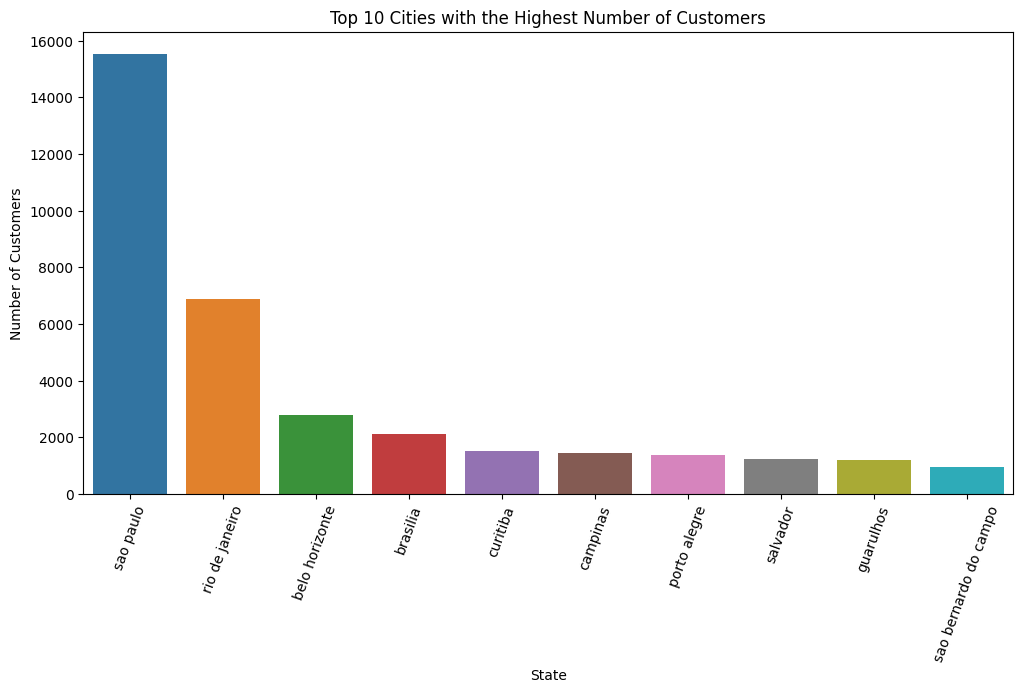

In [148]:
"""
Customer Distribution by City
"""
state_distribution = customers['customer_city'].value_counts()[:10]

plt.figure(figsize=(12, 6))
sns.barplot(x=state_distribution.index, y=state_distribution.values)

plt.title('Top 10 Cities with the Highest Number of Customers')
plt.xlabel('State')
plt.xticks(rotation=70)
plt.ylabel('Number of Customers')
plt.show()

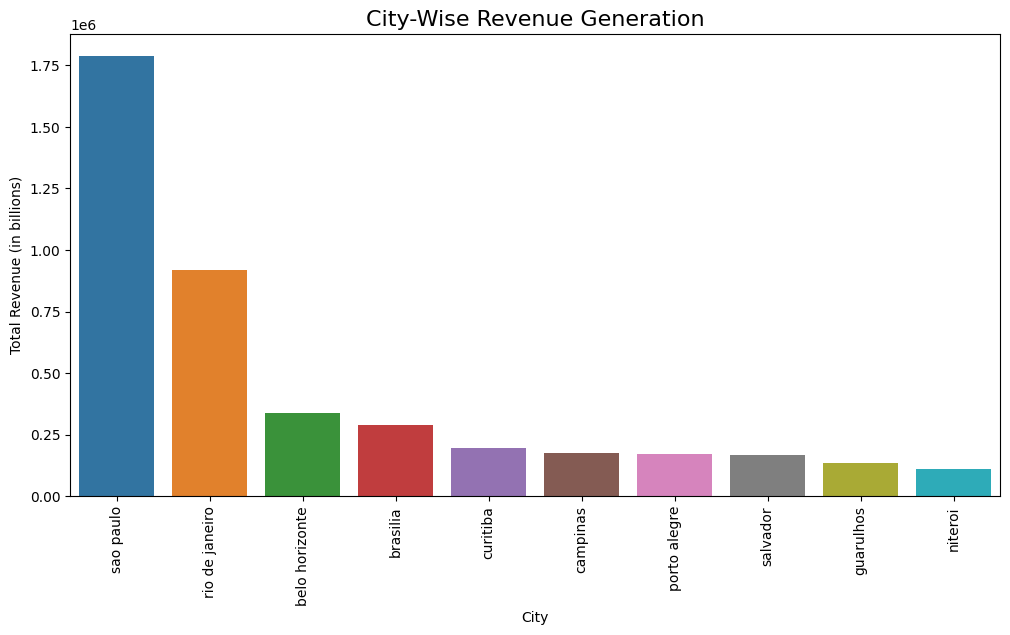

In [149]:
"""
Revenue Generation for top 10 cities
"""
city_revenue=(top_customers.groupby('customer_city')['total_payment_value']  
    .sum()  
    .reset_index()  
    .sort_values(by='total_payment_value', ascending=False)  
)

plt.figure(figsize=(12, 6))
sns.barplot(x='customer_city', y='total_payment_value', data=city_revenue[:10])
plt.title('City-Wise Revenue Generation', fontsize=16)
plt.xlabel('City')
plt.ylabel('Total Revenue (in billions)')
plt.xticks(rotation=90)
plt.show()

### 2. Order Analysis

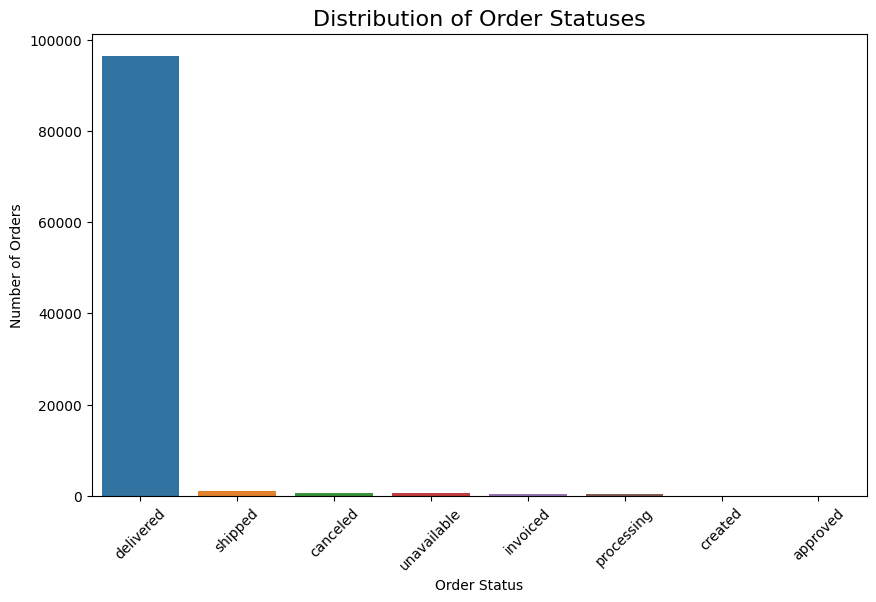

In [150]:
"""
Order Status Distribution
"""
order_status_dist = orders['order_status'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=order_status_dist.index, y=order_status_dist.values)
plt.title('Distribution of Order Statuses', fontsize=16)
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

In [151]:
"""
Average Delivery Time
"""
orders_payments['delivery_time'] = (orders_payments['order_delivered_customer_date'] - orders_payments['order_purchase_timestamp']).dt.days
average_delivery_time = orders_payments['delivery_time'].mean()
print(f"Average Delivery Time: {average_delivery_time:.2f} days")


Average Delivery Time: 12.11 days


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


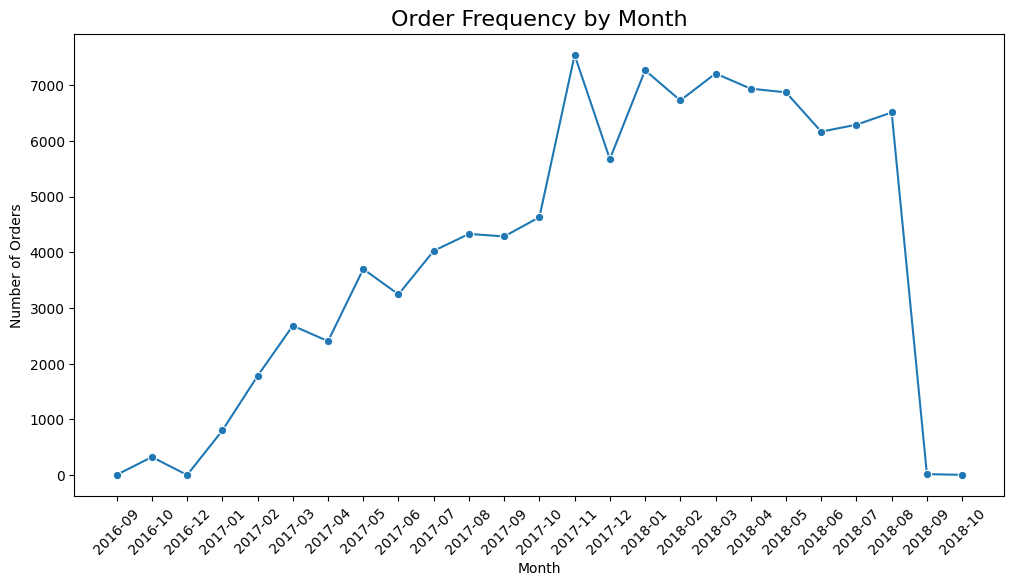

In [152]:
"""
Order Frequency by Month
"""
orders['order_month'] = orders['order_purchase_timestamp'].dt.to_period('M')

monthly_orders = orders.groupby('order_month')['order_id'].count().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_orders['order_month'].astype(str), y=monthly_orders['order_id'], marker='o')
plt.title('Order Frequency by Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

In [153]:
"""
Average Number of Products per Order
"""
avg_products_per_order = items.groupby('order_id')['product_id'].count().mean()
print(f"Average number of products per order: {avg_products_per_order:.2f}")

Average number of products per order: 1.04


## 3. Product Analysis

In [154]:
"""
Which products are sold the most?
"""
top_products = (
    items_products.groupby('product_id')
    .agg(total_revenue=('price', 'sum'))
    .reset_index()
    .sort_values(by='total_revenue', ascending=False)
)
top_products.head(10)

,product_id,total_revenue
24086,bb50f2e236e5eea0100680137654686c,61245.000000
14068,6cdd53843498f92890544667809f1595,52966.597656
27613,d6160fb7873f184099d9bc95e30376af,48899.339844
27039,d1c427060a0f73f6b889a5c7c61f2ac4,44417.582031
19742,99a4788cb24856965c36a24e339b6058,41193.562500
4996,25c38557cf793876c5abdd5931f922db,38907.320312
8051,3dd2a17168ec895c781a9191c1e95ad7,38234.500000
12351,5f504b3a1c75b73d6151be81eb05bdc9,37733.898438
10867,53b36df67ebb7c41585e8d54d6772e08,35646.820312
28970,e0d64dcfaa3b6db5c54ca298ae101d05,31786.820312


In [155]:
"""
Most Popular Product in Each City
"""
popular_products_city = (
    items_products
    .merge(customers_orders, on='order_id', how='left')
    .groupby(['customer_city', 'product_id'])
    .size()
    .reset_index(name='order_count')
)

popular_product_city = popular_products_city.loc[
    popular_products_city.groupby('customer_city')['order_count'].idxmax()
]    .sort_values(by='order_count',ascending=False)

popular_product_city.head(10)

,customer_city,product_id,order_count
77413,sao paulo,aca2eb7d00ea1a7b8ebd4e68314663af,76
60213,rio de janeiro,d1c427060a0f73f6b889a5c7c61f2ac4,52
7535,belo horizonte,99a4788cb24856965c36a24e339b6058,16
10432,brasilia,4c2394abfbac7ff59ec7a420918562fa,14
52290,porto alegre,aca2eb7d00ea1a7b8ebd4e68314663af,12
62852,salvador,d1c427060a0f73f6b889a5c7c61f2ac4,11
22074,curitiba,f5d8f4fbc70ca2a0038b9a0010ed5cb0,10
14176,campinas,99a4788cb24856965c36a24e339b6058,9
69858,sao jose dos campos,aca2eb7d00ea1a7b8ebd4e68314663af,8
65739,santos,4c2394abfbac7ff59ec7a420918562fa,8


In [156]:
"""
Most Popular Category in Each City
"""

popular_category_city = (
    items_products
    .merge(customers_orders, on='order_id', how='left')
    .groupby(['customer_city', 'product_category'])
    .size()
    .reset_index(name='order_count')
)

popular_category_city = popular_category_city.loc[
    popular_category_city.groupby('customer_city')['order_count'].idxmax()
].sort_values(by='order_count', ascending=False)

popular_category_city.head(10)



,customer_city,product_category,order_count
21999,sao paulo,bed table bath,2061
19219,rio de janeiro,bed table bath,896
2661,belo horizonte,bed table bath,367
3313,brasilia,HEALTH BEAUTY,228
18015,porto alegre,bed table bath,183
4295,campinas,bed table bath,163
9305,guarulhos,bed table bath,147
6914,curitiba,bed table bath,138
19740,salvador,HEALTH BEAUTY,134
15026,niteroi,bed table bath,103


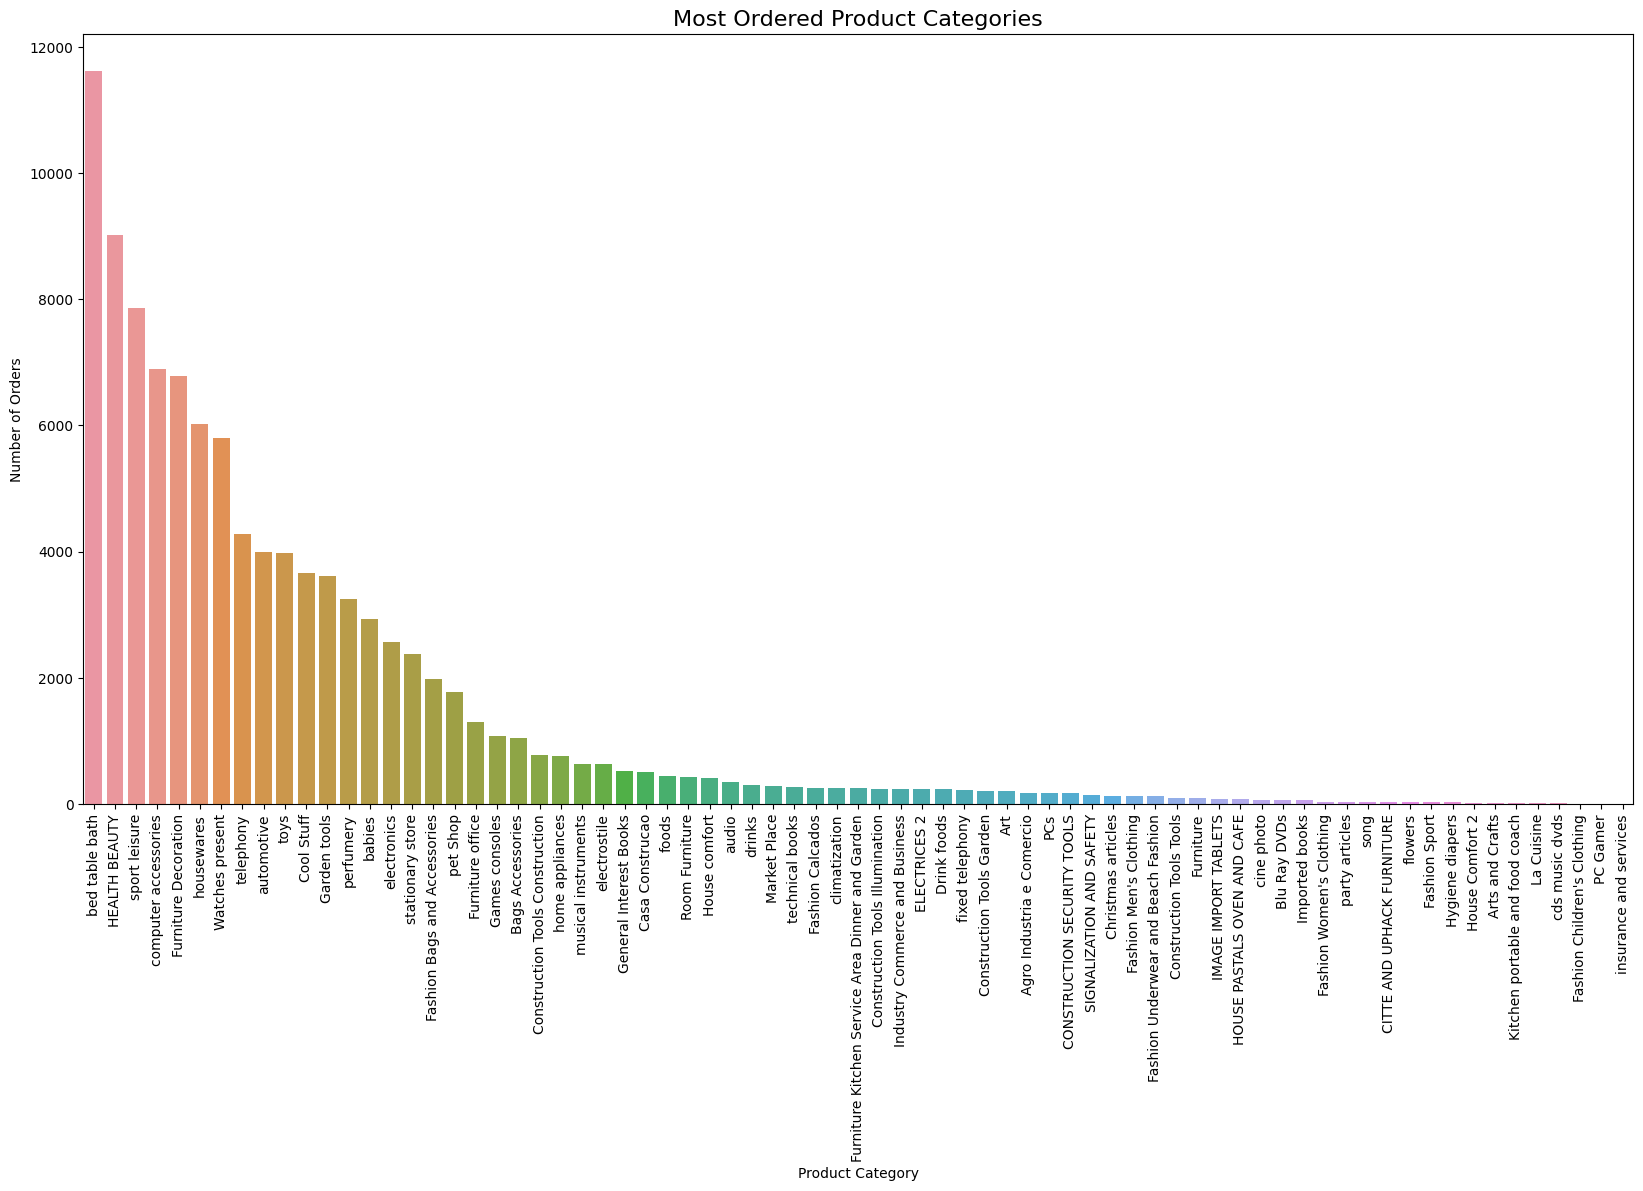

,product_category,count
49,bed table bath,11620
30,HEALTH BEAUTY,9022
68,sport leisure,7858
53,computer accessories,6887
24,Furniture Decoration,6781
...,...,...
39,La Cuisine,13
50,cds music dvds,12
18,Fashion Children's Clothing,8
41,PC Gamer,8


In [157]:
"""
Most Ordered Product Categories
"""
product_category_orders = (
    items_products.groupby('product_category')
    .agg(count=('order_id', 'count'))
    .reset_index()
    .sort_values(by='count', ascending=False)
)

plt.figure(figsize=(20, 10))
sns.barplot(x=product_category_orders['product_category'], y=product_category_orders['count'])
plt.title('Most Ordered Product Categories', fontsize=16)
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()

product_category_orders

In [158]:
"""
Monthly Revenue of Top 5 Categories
"""
orders_products['year_month'] = orders_products['order_purchase_timestamp'].dt.to_period('M')
monthly_revenue = orders_products.groupby(['product_category', 'year_month'])['price'].sum().reset_index()
monthly_revenue_pivot_table = monthly_revenue.pivot(index='product_category', columns='year_month', values='price').fillna(0)
monthly_revenue_pivot_table['Total'] = monthly_revenue_pivot_table.sum(axis=1)
monthly_revenue_pivot_table = monthly_revenue_pivot_table.sort_values('Total', ascending=False).drop(columns='Total')
monthly_revenue_pivot_table.head(5)

year_month,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,...,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
product_category,,,,,,,,,,,,,,,,,,,,,
HEALTH BEAUTY,44.990002,4382.720215,0.0,12377.620117,22327.949219,25565.939453,22214.220703,45220.968750,31161.119141,33307.828125,...,59383.507812,70424.937500,83350.421875,86063.539062,88798.976562,90775.570312,103689.492188,101015.257812,116941.148438,0.0
Watches present,0.000000,3360.239990,0.0,8086.520020,11631.250000,26702.378906,23306.589844,36881.500000,28919.630859,36524.570312,...,70959.617188,73337.242188,62407.511719,96947.078125,90639.070312,121496.289062,85188.960938,95748.687500,71810.390625,0.0
bed table bath,0.000000,505.220001,0.0,5394.970215,23715.660156,30502.130859,30793.791016,42219.308594,38810.179688,62919.589844,...,62990.351562,90899.671875,67845.320312,79888.101562,75079.343750,68210.781250,69789.007812,54131.738281,59539.968750,0.0
sport leisure,0.000000,3333.640137,0.0,8272.860352,15354.139648,25642.839844,23819.000000,33746.667969,31873.050781,35710.261719,...,56801.890625,87270.296875,71446.156250,79650.226562,62481.781250,57107.789062,41581.941406,52050.167969,50022.609375,0.0
computer accessories,0.000000,1399.320068,0.0,3261.919922,11529.360352,26155.888672,19499.529297,38629.929688,34412.640625,32340.019531,...,34307.710938,72276.039062,87934.906250,76585.601562,54657.500000,46243.050781,37971.269531,39633.121094,37350.980469,0.0


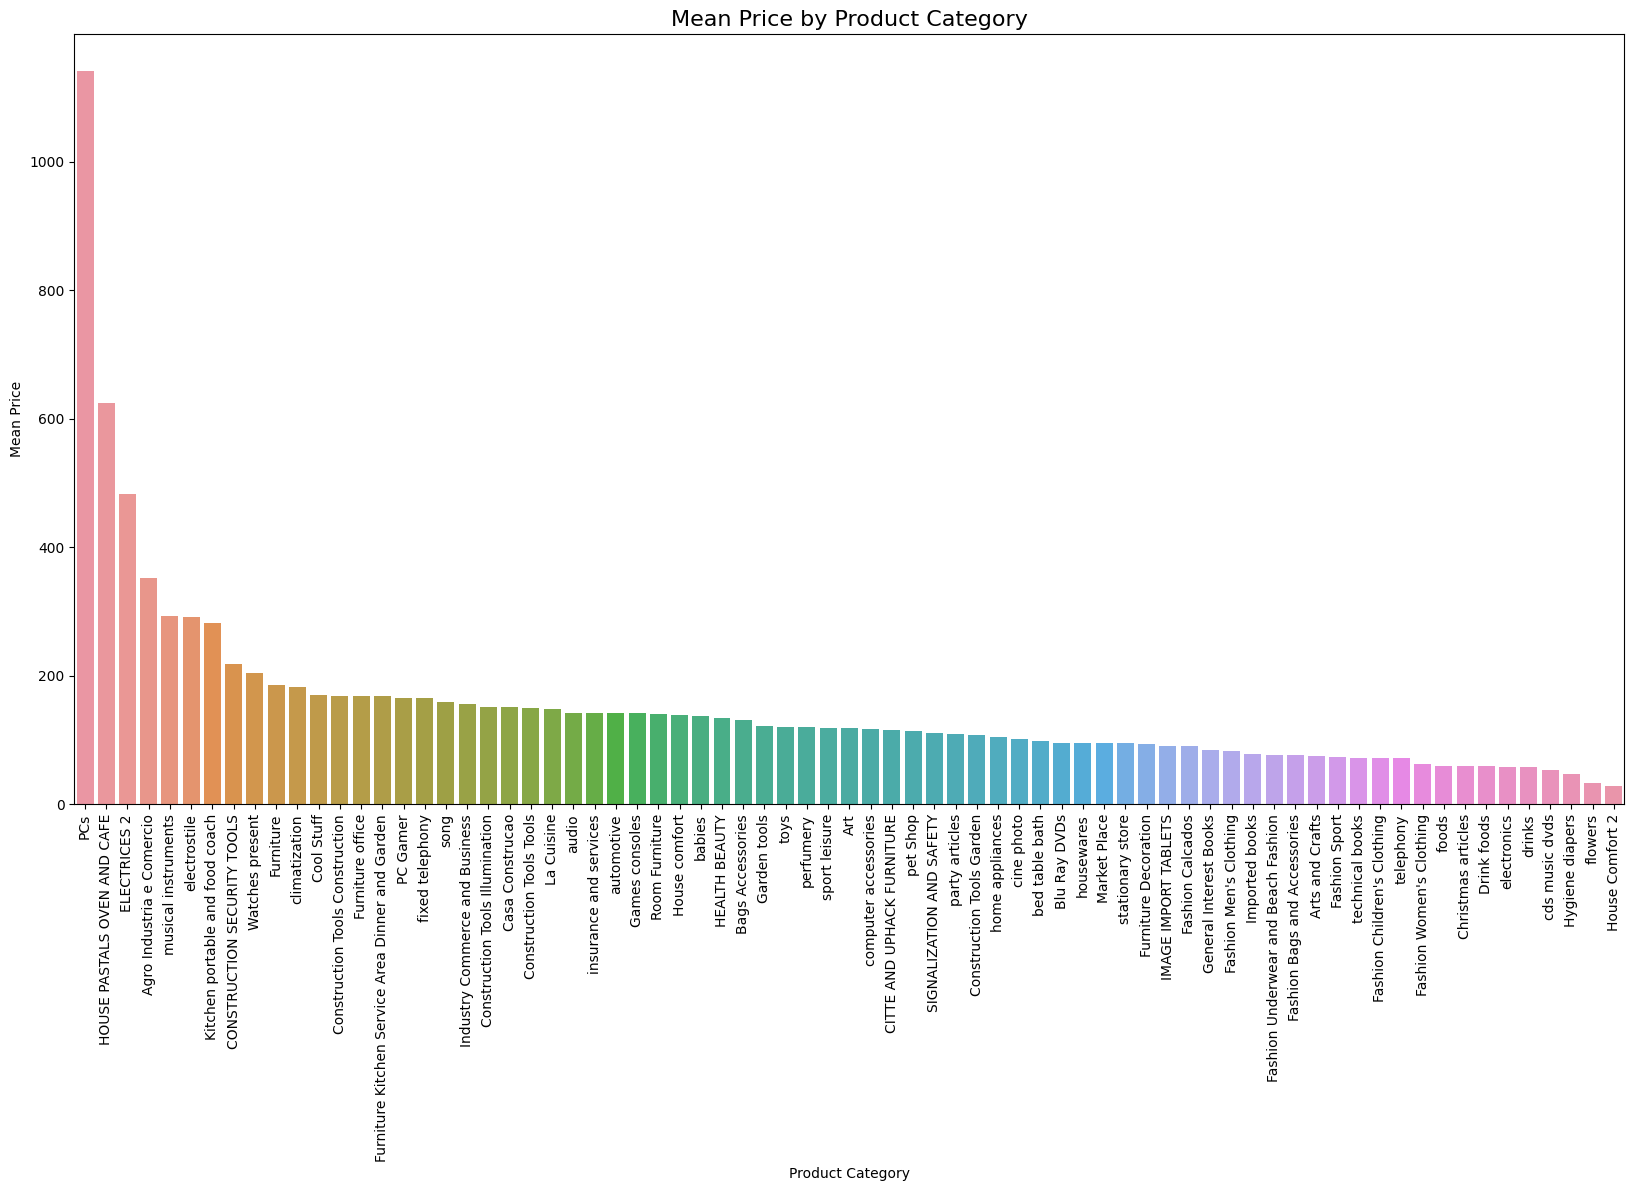

,product_category,mean_price
42,PCs,1141.459595
31,HOUSE PASTALS OVEN AND CAFE,624.285645
15,ELECTRICES 2,483.264801
0,Agro Industria e Comercio,351.167664
63,musical instruments,293.112671
...,...,...
54,drinks,57.019371
50,cds music dvds,53.333332
34,Hygiene diapers,46.466293
58,flowers,33.204826


In [159]:
"""
Mean Price by Product Category
"""
avg_price_category = items_products.groupby('product_category').agg(mean_price=('price','mean')).reset_index().sort_values(by='mean_price',ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x=avg_price_category['product_category'], y=avg_price_category['mean_price'])
plt.title('Mean Price by Product Category', fontsize=16)
plt.xlabel('Product Category')
plt.ylabel('Mean Price')
plt.xticks(rotation=90)
plt.show()
avg_price_category

In [160]:
"""
Revenue Percentage by Product Category
"""
category_revenue = (
    items_products.groupby('product_category')['price'].sum().reset_index()
)

category_revenue['revenue_percentage'] = (category_revenue['price'] / category_revenue['price'].sum()) * 100

category_revenue = category_revenue.drop('price',axis=1).sort_values(by='revenue_percentage', ascending=False)

category_revenue.head(10)


,product_category,revenue_percentage
30,HEALTH BEAUTY,9.511591
45,Watches present,9.318433
49,bed table bath,8.896185
68,sport leisure,7.291878
53,computer accessories,6.328625
24,Furniture Decoration,4.967418
13,Cool Stuff,4.877868
61,housewares,4.502913
47,automotive,4.423914
72,toys,3.724951


### 4. Payment Analysis

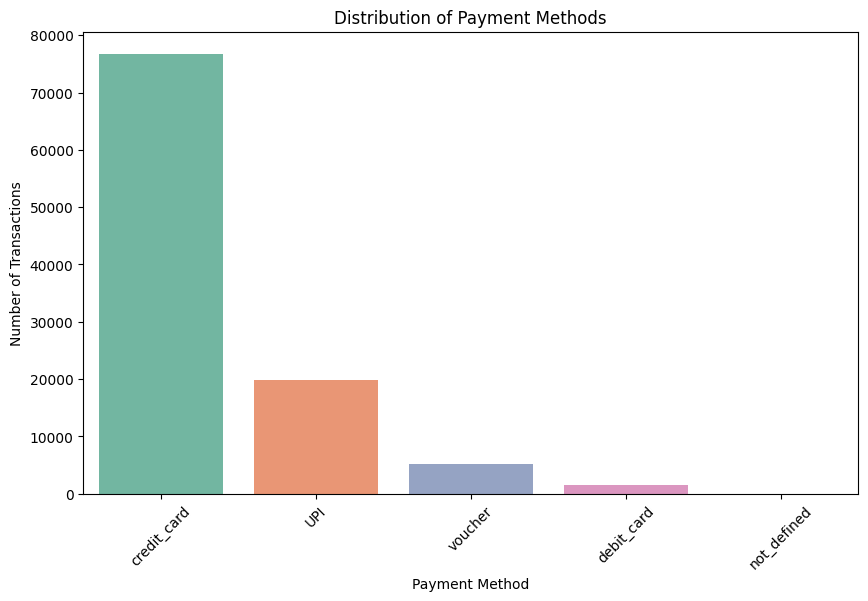

In [161]:
"""
Distribution of Payment Methods
"""
payment_distribution = payments['payment_type'].value_counts().reset_index()
payment_distribution.columns = ['payment_type', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=payment_distribution, x='payment_type', y='count', palette='Set2')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

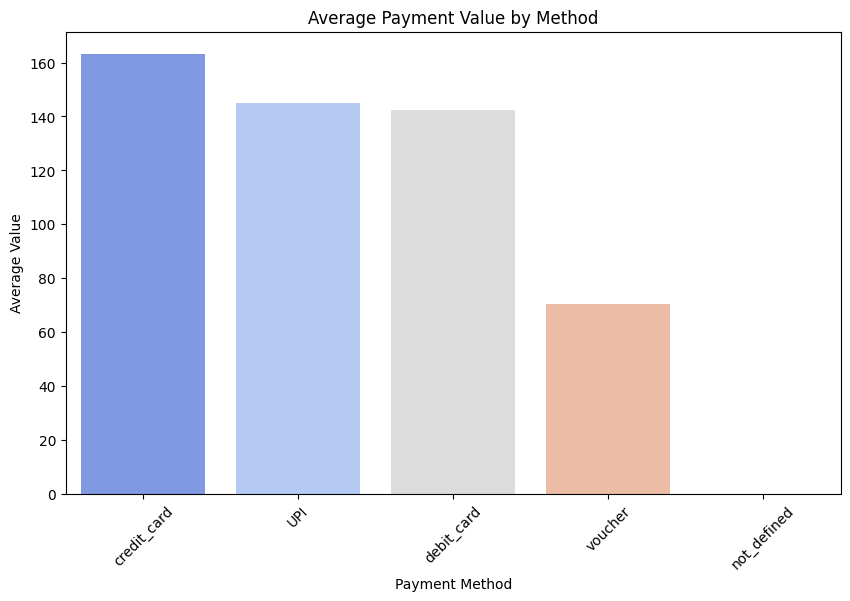

In [162]:
"""
Average Payment Value per Payment Method
"""
avg_payment = payments.groupby('payment_type')['payment_value'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_payment, x='payment_type', y='payment_value', palette='coolwarm')
plt.title('Average Payment Value by Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()

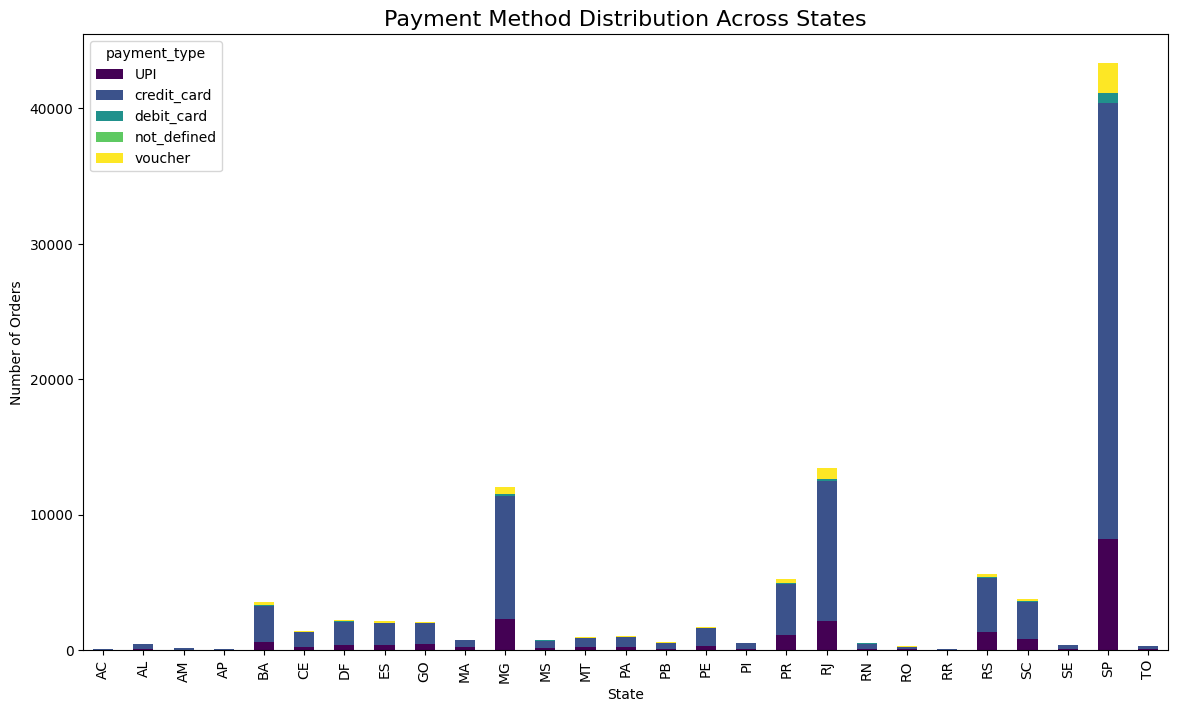

In [164]:
"""
Payment Method Distribution Across States
"""
orders_payments_customers = (
    orders
    .merge(payments, on='order_id', how='left')
    .merge(customers, on='customer_id', how='left')
)
payment_distribution = orders_payments_customers.groupby(['customer_state', 'payment_type']).size().reset_index(name='count')
payment_distribution_pivot = payment_distribution.pivot(index='customer_state', columns='payment_type', values='count').fillna(0)
payment_distribution_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Payment Method Distribution Across States', fontsize=16)
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()

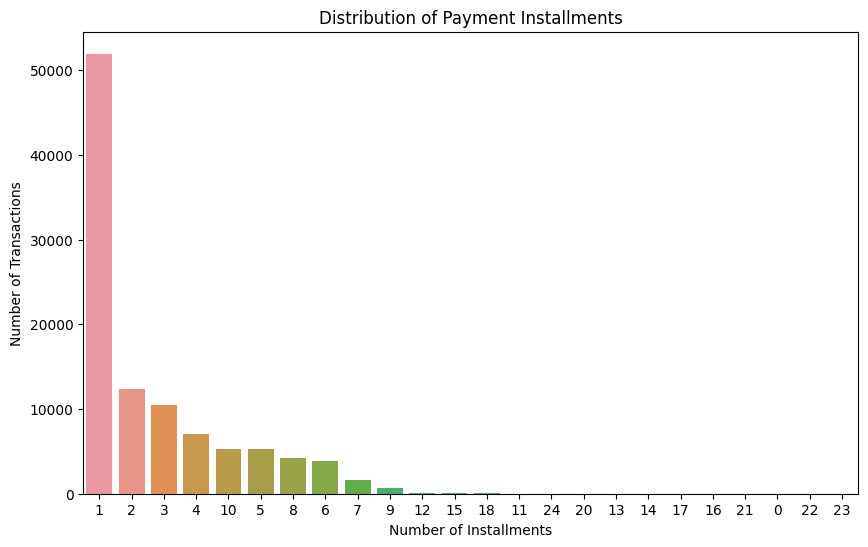

In [191]:
"""
Distribution of Installments
"""
plt.figure(figsize=(10,6))
sns.countplot(x='payment_installments', data=payments, order=payments['payment_installments'].value_counts().index[:24])
plt.title("Distribution of Payment Installments")
plt.xlabel("Number of Installments")
plt.ylabel("Number of Transactions")
plt.show()

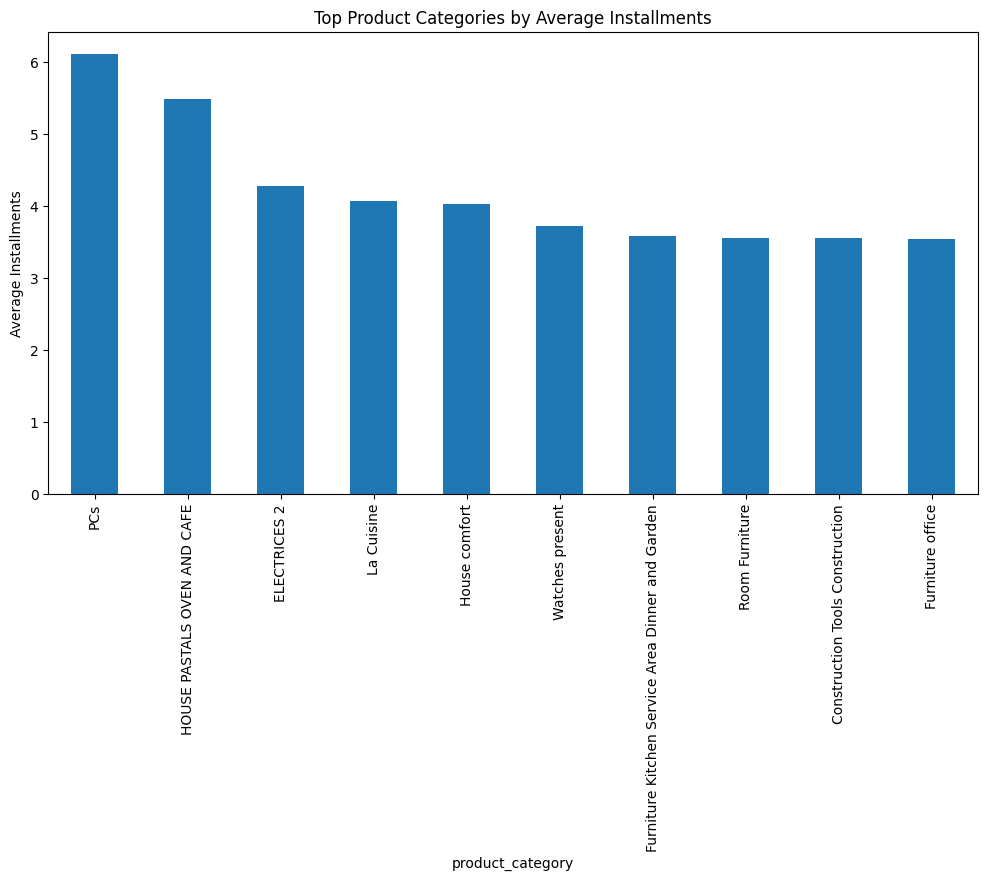

In [167]:
"""
Which product categories are often bought with many installments?
"""
top_installment_categories = items_products.merge(payments, on='order_id', how='left').groupby('product_category')['payment_installments'].mean().sort_values(ascending=False).head(10)
top_installment_categories.plot(kind='bar', figsize=(12,6), title="Top Product Categories by Average Installments")
plt.ylabel("Average Installments")
plt.show()

## 5. Sellers and Shipping Analysis

Text(0, 0.5, 'No. of Orders')

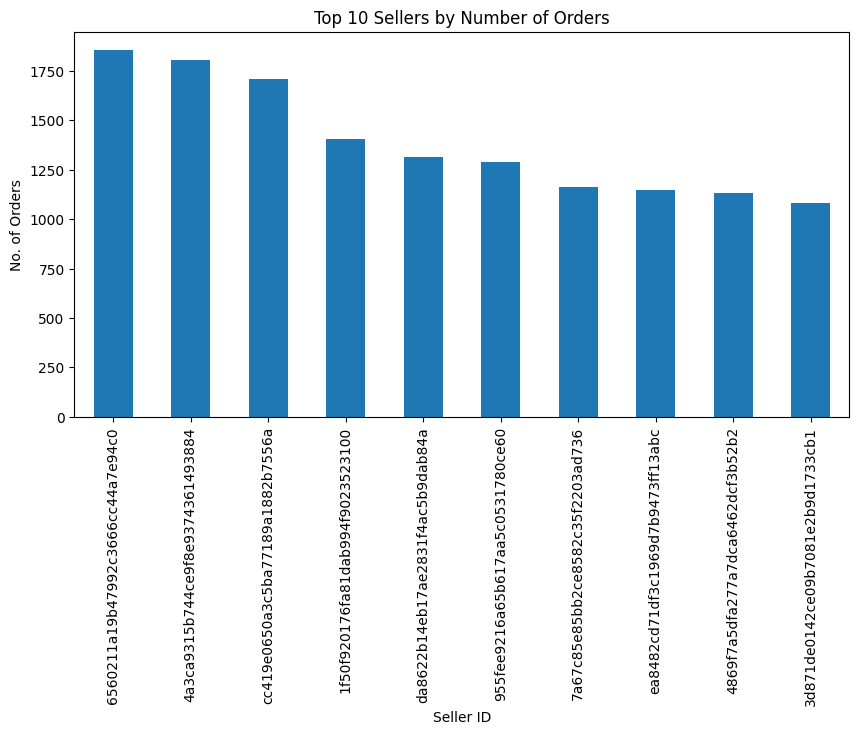

In [168]:
"""
Top Sellers by Number of Orders
"""
top_sellers = items.groupby('seller_id')['order_id'].nunique().sort_values(ascending=False).head(10)
top_sellers.plot(kind='bar', figsize=(10, 5), title='Top 10 Sellers by Number of Orders')
plt.xlabel("Seller ID")
plt.ylabel("No. of Orders")

Text(0, 0.5, 'No. of Sellers')

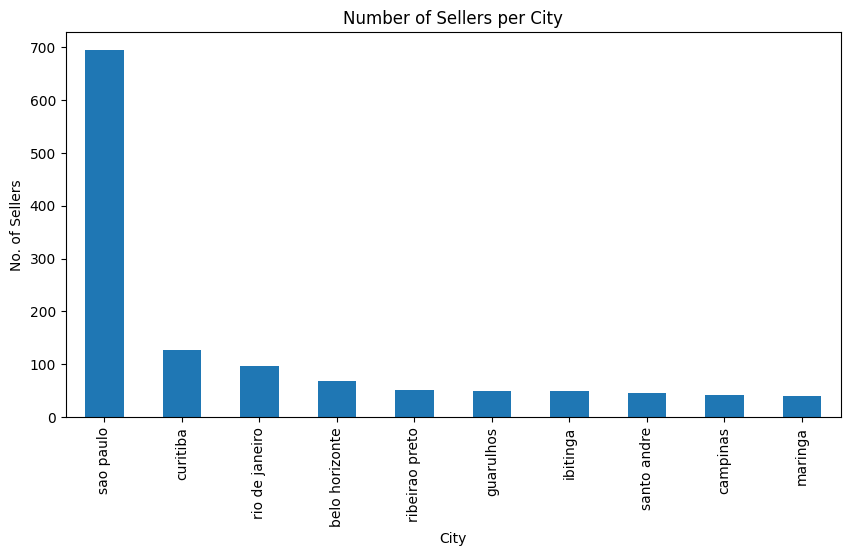

In [169]:
"""
Sellers per City
"""
sellers_per_state = sellers['seller_city'].value_counts()[:10]
sellers_per_state.plot(kind='bar', figsize=(10,5), title='Number of Sellers per City')
plt.xlabel("City")
plt.ylabel("No. of Sellers")

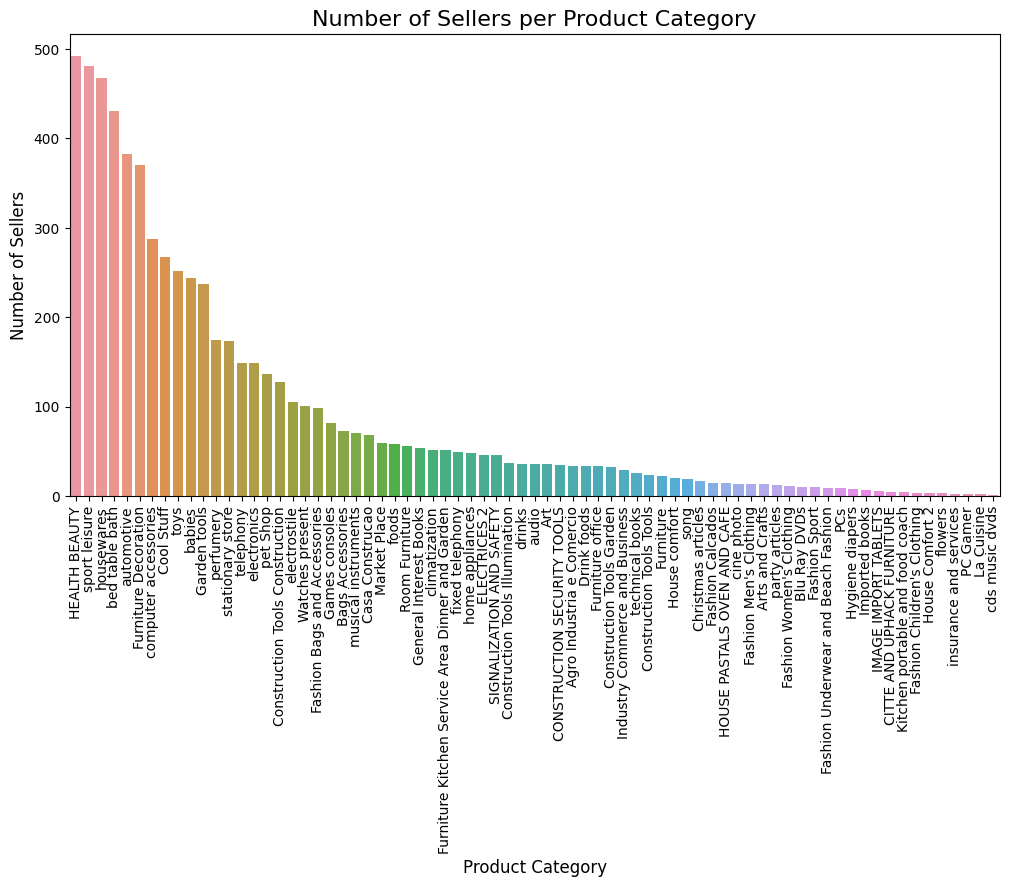

In [201]:
"""
No. of Sellers in Each Category
"""
sellers_categories = pd.merge(sellers, items_products, on='seller_id', how='left')
category_seller_count = sellers_categories.groupby('product_category')['seller_id'].nunique().reset_index()
category_seller_count = category_seller_count.sort_values(by='seller_id', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='product_category', y='seller_id', data=category_seller_count)
plt.title('Number of Sellers per Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Sellers', fontsize=12)
plt.xticks(rotation=90)  
plt.show()


Text(0, 0.5, 'No. of Times')

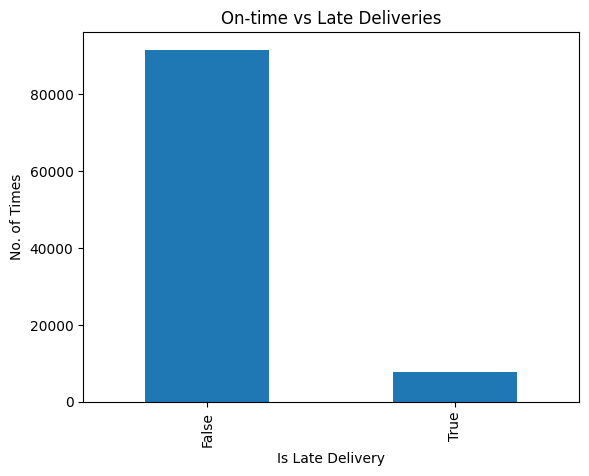

In [203]:
"""
On-time VS. Late Deliveries
"""
orders['is_late'] = orders['order_delivered_customer_date'] > orders['order_estimated_delivery_date']
late_count = orders['is_late'].value_counts()
late_count.plot(kind='bar', title='On-time vs Late Deliveries')
plt.xlabel("Is Late Delivery")
plt.ylabel("No. of Times")